# Introduction

As ANN gives the best result, We optimized the ANN model in this code file.

## Loading Libraries

In [ ]:
!pip install --upgrade numpy tensorflow h5py

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
   ------- -------------------------------- 0.5/3.0 MB 1.1 MB/s eta 0:00:03
   ---------- ----------------------------- 0.8/3.0 MB 1.1 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/3.0 MB 1.1 MB/s eta 0:00:02
   ----------------- ---------------------- 1.3/3.0 MB 1.1 MB/s eta 0:00:02
   --------------------- ------------------ 1.6/3.0 MB 1.1 MB/s eta 0:00:02
   ------------------------ --------------- 1.8/3.0 MB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 2.1/3.0 MB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 2.1/3.0 MB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 2.1/3.0 MB 1.1 MB/s eta 0:00:01
   ----------------------------

In [ ]:
!pip install numpy==1.23.5 tensorflow==2.10.0 h5py==3.8.0

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
      --------------------------------------- 0.3/10.7 MB ? eta -:--:--
     - -------------------------------------- 0.5/10.7 MB 1.2 MB/s eta 0:00:09
     -- ------------------------------------- 0.8/10.7 MB 1.2 MB/s eta 0:00:09
     --- ------------------------------------ 1.0/10.7 MB 1.2 MB/s eta 0:00:09
     ---- ----------------------------------- 1.3/10.7 MB 1.1 MB/s eta 0:00:09
     ---- ----------------------------------- 1.3/10.7 MB 1.1 MB/s eta 0:00:09
     ----- ---------------------------------- 1.6/10.7 MB 1.1 MB/s eta 0:00:09
     ------ --------------------------------- 1.8/10.7 MB 1.1 MB/s eta 0:00:09
     ------- -------------------------------- 2.1/10.7 MB 1.1 MB/s eta 0:00:08
     -------- ------------------------------- 2.4/10.7 MB 1.1 MB/s eta 0:0

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^^^^^^^^^

In [ ]:
!pip uninstall numpy tensorflow h5py

In [ ]:
!pip install numpy tensorflow h5py

In [ ]:
import numpy
import tensorflow
import h5py

print("Numpy version:", numpy.__version__)
print("TensorFlow version:", tensorflow.__version__)
print("h5py version:", h5py.__version__)

Numpy version: 2.0.2
TensorFlow version: 2.18.0
h5py version: 3.13.0


In [ ]:
!pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import KFold, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from bayes_opt import BayesianOptimization

In [ ]:
plt.rcParams['font.family'] = 'Times New Roman'

# Loading Dataset

Need to change the filename for other dataset: P2, OFS, PFS, OFS, and PFS.

In [ ]:
filename = 'Dataset O.xlsx'
df = pd.read_excel(filename, index_col=0)
X, Y = df.iloc[:, :-1], df.iloc[:, -1]

In [ ]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

for train_index, test_index in stratified_split.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

print('X_train: {}     Y_train: {} \n X_test: {}     Y_test:{} '.format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

X_train: (143, 3406)     Y_train: (143,) 
 X_test: (36, 3406)     Y_test:(36,) 


In [ ]:
def create_model(n_hidden_layers, layer_1_units, layer_2_units, learning_rate):
    n_hidden_layers = int(n_hidden_layers)  # Ensure it's an integer
    layer_1_units = int(layer_1_units)      # Ensure it's an integer
    layer_2_units = int(layer_2_units)      # Ensure it's an integer

    model = Sequential()
    model.add(Dense(layer_1_units, input_dim=X.shape[1], activation='relu'))

    # Add hidden layers
    for _ in range(n_hidden_layers - 1):
        model.add(Dense(layer_2_units, activation='relu'))

    model.add(Dense(1, activation='linear'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [ ]:
def train_model(n_hidden_layers, layer_1_units, layer_2_units, learning_rate):
    mse_list = []
    for train_index, test_index in stratified_split.split(X_train, Y_train):
        X_cv_train, X_cv_test = X_train.iloc[train_index], X_train.iloc[test_index]
        y_cv_train, y_cv_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

        model = create_model(n_hidden_layers, layer_1_units, layer_2_units, learning_rate)

        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model.fit(X_cv_train, y_cv_train, epochs=100, batch_size=32, validation_split=0.2,
                  callbacks=[early_stopping], verbose=0)

        y_pred_test = model.predict(X_cv_test).flatten()
        mse = mean_squared_error(y_cv_test, y_pred_test)
        mse_list.append(mse)

    return -np.mean(mse_list)  # We minimize MSE, so negate it for optimization

In [ ]:
# Define parameter bounds
pbounds = {'n_hidden_layers': (1, 5),
           'layer_1_units': (32, 256),
           'layer_2_units': (32, 256),
           'learning_rate': (0.001, 0.01)}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=train_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = optimizer.max['params']

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

|   iter    |  target   | layer_... | layer_... | learni... | n_hidd... |
-------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
| 1         | -0.004159 | 115.9     | 245.0     | 0.007588  | 3.395     |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
| 2         | -0.004751 | 66.95     | 66.94     | 0.001523  | 4.465     |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
| 3         | -0.004422 | 166.6     | 190.6     | 0.001185  | 4.88      |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
| 4         | -0.004589 | 218.5     | 79.56     | 0.002636  | 1.734     |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 5         | -0.004395 | 100.2     | 149.5     | 0.004888  | 2.165     |


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 6         | -0.011    | 106.3     | 245.1     | 0.00715   | 1.03      |
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
| 7         | -0.003676 | 43.02     | 36.14     | 0.006405  | 3.895     |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
| 8         | -0.00397  | 33.0      | 41.04     | 0.005198  | 2.408     |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
| 9         | -0.02027  | 249.5     | 191.0     | 0.009945  | 2.496     |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
| 10        | -0.01068  | 137.6     | 67.95     | 0.008218  | 1.386     |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
| 11        | -0.004499 | 242.2     | 190.2     | 0.005051  | 4.994     |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
| 12        | -0.004674 | 205.6     | 229.6     | 0.003045  | 2.49      |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
| 13        | -0.004751 | 75.36     | 171.2     | 0.003234  | 4.071     |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
| 14        | -0.01913  | 33.41     | 134.9     | 0.00979   | 3.107     |


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
| 15        | -0.01042  | 198.3     | 149.6     | 0.003703  | 1.079     |
Best Hyperparameters:
{'layer_1_units': np.float64(43.02496968385917), 'layer_2_units': np.float64(36.140236802962725), 'learning_rate': np.float64(0.006404551599751583), 'n_hidden_layers': np.float64(3.8953077887778185)}


In [ ]:
# Train the model with the best hyperparameters
best_model = create_model(**best_params)
best_model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)

# Predict on the training set
y_pred_train = best_model.predict(X_train).flatten()

# Calculate metrics on the training set
mse_train = mean_squared_error(Y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(Y_train, y_pred_train)
r2_train = 1 - mse_train / np.var(Y_train)

# Print the results for training set
print('Training Set: ')
print(f'Mean Squared Error: {mse_train}')
print(f'Root Mean Squared Error: {rmse_train}')
print(f'Mean Absolute Error: {mae_train}')
print(f'R-squared: {r2_train}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Training Set: 
Mean Squared Error: 0.003717501792798267
Root Mean Squared Error: 0.06097131942805787
Mean Absolute Error: 0.043165905665267595
R-squared: 0.9584422159395681


In [ ]:
# Train the model with the best hyperparameters
best_model = create_model(**best_params)
best_model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)

# Predict on the testing set
y_pred_test = best_model.predict(X_test).flatten()

# Calculate metrics on the testing set
mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(Y_test, y_pred_test)
r2_test = 1 - mse_test / np.var(Y_test)

# Print the results for testing set
print('\nTesting Set: ')
print(f'Mean Squared Error: {mse_test}')
print(f'Root Mean Squared Error: {rmse_test}')
print(f'Mean Absolute Error: {mae_test}')
print(f'R-squared: {r2_test}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

Testing Set: 
Mean Squared Error: 0.004434196244876792
Root Mean Squared Error: 0.06658976081107959
Mean Absolute Error: 0.05086959016612835
R-squared: 0.9539533153846868


In [ ]:
# Predict on the training set
y_pred_train = best_model.predict(X_train).flatten()

# Calculate residuals for training set
residuals_train = Y_train - y_pred_train

# Predict on the testing set
y_pred_test = best_model.predict(X_test).flatten()

# Calculate residuals for testing set
residuals_test = Y_test - y_pred_test

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


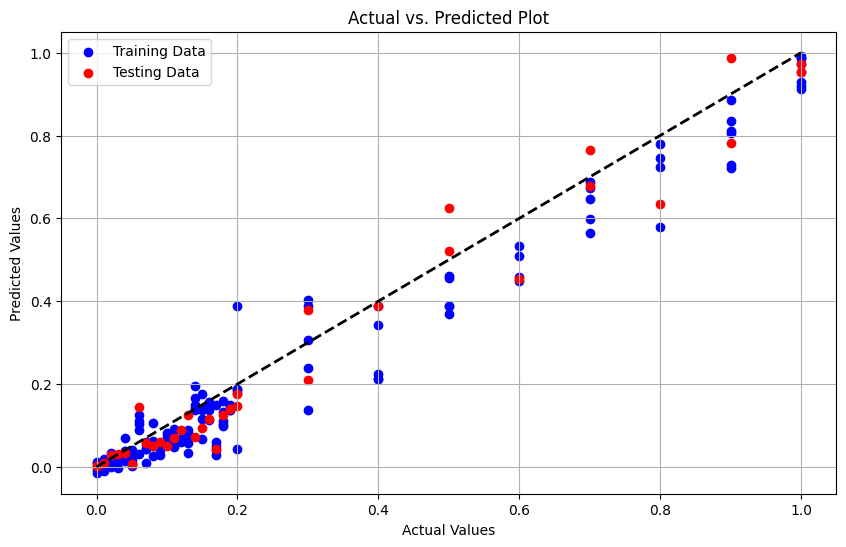

In [ ]:
# Plot actual vs. predicted plot for both training and testing sets
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(Y_train, y_pred_train, color='blue', label='Training Data')

# Plot testing data
plt.scatter(Y_test, y_pred_test, color='red', label='Testing Data')

# Plot diagonal line
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='black', lw=2, linestyle='--')

plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Save the figure with 600 DPI as a JPEG image
plt.savefig('F17.jpg', dpi=600, format='jpg', bbox_inches='tight')

plt.show()

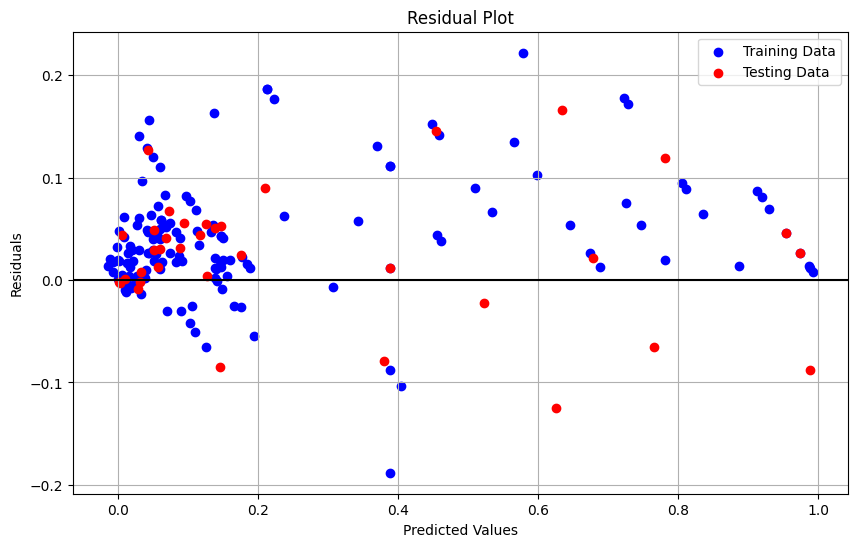

In [ ]:
# Plot residual plot for both training and testing sets
plt.figure(figsize=(10, 6))

# Plot training residuals
plt.scatter(y_pred_train, residuals_train, color='blue', label='Training Data')

# Plot testing residuals
plt.scatter(y_pred_test, residuals_test, color='red', label='Testing Data')

# Plot horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')

plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

# Save the figure with 600 DPI as a JPEG image
plt.savefig('F18.jpg', dpi=600, format='jpg', bbox_inches='tight')

plt.show()